# Preprocessing Template for Loan Prediction

Hello :) Nag-separate ako ng portions where you can change some variables and nag-comment ako sa parts na pwede kayo mag-experiment. 

After  niyo daanan yung steps dito, mags-save yung processed x_train , y_train, x_test, y_test sa csv files at current iteration files folder.

After that pwede na kayo magrun from MachineLearning.ipynb

### Don't forget to activate and deactivate your virtual environment! Pwede mag-crash laptop niyo because of this ehe

open cmd terminal sa VS Code

BEFORE STARTING:
`env\Scripts\activate.bat`


BEFORE CLOSING VS CODE:
`env\Scripts\deactivate.bat`


In [33]:
#imports 
import pandas as pd
import numpy as np
import re
import json
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from scipy.optimize import minimize_scalar

Set dataset path

In [34]:
dataset_path = "./datasets/original.csv"

In [35]:
#import dataset
bank_loan_df = pd.read_csv(dataset_path)

dataset_original_rows = bank_loan_df.shape[0]

#change column names for easier manipulation
bank_loan_df.columns = bank_loan_df.columns.str.replace(' ', '_') 

#show columns
bank_loan_df.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'Income_(USD)',
       'Income_Stability', 'Profession', 'Type_of_Employment', 'Location',
       'Loan_Amount_Request_(USD)', 'Current_Loan_Expenses_(USD)',
       'Expense_Type_1', 'Expense_Type_2', 'Dependents', 'Credit_Score',
       'No._of_Defaults', 'Has_Active_Credit_Card', 'Property_ID',
       'Property_Age', 'Property_Type', 'Property_Location', 'Co-Applicant',
       'Property_Price', 'Loan_Sanction_Amount_(USD)'],
      dtype='object')

From the column names shown above, choose the unnecessary columns (list) and target column (string).

In [36]:
# does not make sense to predict based on these columns
unnecessary_columns = ['Customer_ID', 'Name'] #list

target_column = 'Loan_Sanction_Amount_(USD)' #string

In [37]:
dropped_rows = {"target column missing value": bank_loan_df[target_column].isna().sum()}
dropped_columns = dict()
bank_loan_df = bank_loan_df.dropna(subset=[target_column])

#drop duplicates
if bank_loan_df.duplicated().sum() != 0:
    dropped_rows.update({"duplicates": bank_loan_df.duplicated().sum()})
    bank_loan_df.drop_duplicates(inplace=True)

for column in unnecessary_columns:
    if "unnecessary" in dropped_columns:
        dropped_columns["unnecessary"] += [column]
    else:
        dropped_columns.update({"unnecessary": [column]})


bank_loan_df.drop(unnecessary_columns, axis=1, inplace=True)

bank_loan_df.reset_index(drop=True, inplace=True)

#print dataset info
print(bank_loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29660 entries, 0 to 29659
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29608 non-null  object 
 1   Age                          29660 non-null  int64  
 2   Income_(USD)                 25167 non-null  float64
 3   Income_Stability             28002 non-null  object 
 4   Profession                   29660 non-null  object 
 5   Type_of_Employment           22472 non-null  object 
 6   Location                     29660 non-null  object 
 7   Loan_Amount_Request_(USD)    29660 non-null  float64
 8   Current_Loan_Expenses_(USD)  29493 non-null  float64
 9   Expense_Type_1               29660 non-null  object 
 10  Expense_Type_2               29660 non-null  object 
 11  Dependents                   27214 non-null  float64
 12  Credit_Score                 27990 non-null  float64
 13  No._of_Defaults 

Make sure categorical variables above have Dtype of object and numerical variables have Dtype int64/int32/float64. If not:

In [38]:
# IN CASE lahat or maraming columns ang kailangan ibahin, run niyo muna ito para madaling ma-generate yung dictionary
# IF KONTI lang iibahin na Dtypes, dun na kayo sa next cell
placeholder = dict()

for column in bank_loan_df.columns:
    placeholder.update({column: str(bank_loan_df[column].dtype)})

placeholder

{'Gender': 'object',
 'Age': 'int64',
 'Income_(USD)': 'float64',
 'Income_Stability': 'object',
 'Profession': 'object',
 'Type_of_Employment': 'object',
 'Location': 'object',
 'Loan_Amount_Request_(USD)': 'float64',
 'Current_Loan_Expenses_(USD)': 'float64',
 'Expense_Type_1': 'object',
 'Expense_Type_2': 'object',
 'Dependents': 'float64',
 'Credit_Score': 'float64',
 'No._of_Defaults': 'int64',
 'Has_Active_Credit_Card': 'object',
 'Property_ID': 'int64',
 'Property_Age': 'float64',
 'Property_Type': 'int64',
 'Property_Location': 'object',
 'Co-Applicant': 'int64',
 'Property_Price': 'float64',
 'Loan_Sanction_Amount_(USD)': 'float64'}

In [39]:
# ibahin niyo yung dictionary item ng 'column':'datatype' if needed
placeholder = {'Gender': 'object',
                'Age': 'int64',
                'Income_(USD)': 'float64'}

bank_loan_df.astype(placeholder).dtypes

Gender                          object
Age                              int64
Income_(USD)                   float64
Income_Stability                object
Profession                      object
Type_of_Employment              object
Location                        object
Loan_Amount_Request_(USD)      float64
Current_Loan_Expenses_(USD)    float64
Expense_Type_1                  object
Expense_Type_2                  object
Dependents                     float64
Credit_Score                   float64
No._of_Defaults                  int64
Has_Active_Credit_Card          object
Property_ID                      int64
Property_Age                   float64
Property_Type                    int64
Property_Location               object
Co-Applicant                     int64
Property_Price                 float64
Loan_Sanction_Amount_(USD)     float64
dtype: object

Recheck Dtypes above.

Check unique values of categorical variables if they have impossible values (missing values/nan not included).

In [40]:
for column in bank_loan_df.columns:
    if bank_loan_df[column].dtype == "object":
        print(column)
        print(bank_loan_df[column].unique())
        print()

Gender
['F' 'M' nan]

Income_Stability
['Low' 'High' nan]

Profession
['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Type_of_Employment
['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']

Location
['Semi-Urban' 'Rural' 'Urban']

Expense_Type_1
['N' 'Y']

Expense_Type_2
['N' 'Y']

Has_Active_Credit_Card
[nan 'Unpossessed' 'Active' 'Inactive']

Property_Location
['Rural' 'Urban' 'Semi-Urban' nan]



Remove rows with impossible values (do not include missing values). You can run the next cell multiple times to remove more impossible values.

In [41]:
# change value for variable (ex. "Gender") and impossible_value (ex. "A")

column = "Gender"
impossible_value = "A"

removed = bank_loan_df[column][bank_loan_df[column] == impossible_value].count()

if removed != 0:

    if "impossible_value" in dropped_rows:  
        dropped_rows["impossible_value"] += removed

    else:
        dropped_rows.update({"impossible_value" : removed})
        
    bank_loan_df = bank_loan_df[bank_loan_df[column] != impossible_value]

Check for impossible values in the target column.

In [42]:
bank_loan_df[target_column].describe()

count     29660.000000
mean      47649.342208
std       48221.146686
min        -999.000000
25%           0.000000
50%       35209.395000
75%       74261.250000
max      481907.320000
Name: Loan_Sanction_Amount_(USD), dtype: float64

In [43]:
y_impossible_choices = ["remove all <= 0", "remove all < 0", "do nothing"]
valid_input = False
while valid_input == False:
    string_choice = ""
    removed=0
    for i in range(len(y_impossible_choices)):
        if y_impossible_choices[i] == "remove all <= 0":
            removed = bank_loan_df[bank_loan_df[target_column] <= 0 ][target_column].count()
        elif y_impossible_choices[i] == "remove all < 0":
            removed = bank_loan_df[bank_loan_df[target_column] < 0 ][target_column].count()

        string_choice += str(i) + ": " + y_impossible_choices[i] + " (will remove {} rows) | ".format(removed)

    choice = input("What to do with y impossible values? " + string_choice + "Enter integer of choice. ")

    try:
        choice = int(choice)
        if int(choice) in range(len(y_impossible_choices)):
            y_impossible_choice = y_impossible_choices[choice]
            valid_input = True
       
    except:
        print("Invalid input. Try again.")

removed = 0
if y_impossible_choice == "remove all <= 0":
    removed = bank_loan_df[bank_loan_df[target_column] <= 0 ][target_column].count()
    bank_loan_df = bank_loan_df[bank_loan_df[target_column] > 0 ]
elif y_impossible_choice == "remove all < 0":
    removed = bank_loan_df[bank_loan_df[target_column] < 0 ][target_column].count()
    bank_loan_df = bank_loan_df[bank_loan_df[target_column] >= 0 ]

if removed != 0:

    if "impossible_value" in dropped_rows:
        dropped_rows["impossible_value"] += removed
    else:
        dropped_rows.update({"impossible_value" : removed})
        
    bank_loan_df = bank_loan_df[bank_loan_df[column] != impossible_value]

In [44]:
#applying one hot encoding to the data 
ohe_df = pd.get_dummies(bank_loan_df, dtype=int, dummy_na=True)

## Splitting dataset

In [45]:
x_df = ohe_df.drop([target_column], axis=1).reset_index(drop=True)
y_df = ohe_df[target_column].reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=17)

In [46]:
indexes = list()
for index in x_train.index:
    if index not in y_train.index:
        indexes.append(index)

print(len(indexes))

0


## Treating missing values
- Deletion

   Remove columns with null values and/or remove rows with null values.


- Replace

   For numerical: replace with column mean

   For categorical: replace with column mode or fill values with a new category


- Predict

   Using other columns pwede ipredict yung missing value kaso baka too complicated na so no need to explore this unless trip niyo talaga

<h4 style="color:yellow;"> Run code below and experiment with different choices for treating missing values! </h4>

In [47]:
missing_value_steps = dict()

for column in bank_loan_df.columns:

    if bank_loan_df[column].isna().sum() == 0:
        continue

    if bank_loan_df[column].dtype == "object": 

        options_object = ("delete_rows", "delete_column", "replace_mode", "replace_new", "predict_c")
        object_string = ""
        for i in range(len(options_object)):
            object_string = object_string + str(i) + " : " + options_object[i] + " | "
        
        valid_input = False

        while valid_input == False:

            choice = input("How do you want to process " + column + " with " + str(bank_loan_df[column].isna().sum()) + " missing values? " + object_string+ "Input the integer of your choice. ")
            try:
                choice = int(choice)
                if choice in range(len(options_object)):
                    valid_input = True
            except:
                print("That is not a valid input. Choose again.")

        missing_value_steps.update({column:options_object[choice]})

    else: 
        
        options_numerical = ("delete_rows", "delete_column", "replace_mean", "predict_r")

        numerical_string = ""

        for i in range(len(options_numerical)):
            numerical_string = numerical_string + str(i) + " : " + options_numerical[i] + " | "
        
        valid_input = False

        while valid_input == False:

            choice = input("How do you want to process " + column + " with " + str(bank_loan_df[column].isna().sum()) + " missing values? " + numerical_string+ "Input the integer of your choice. ")

            try:
                choice = int(choice)
                if choice in range(len(options_numerical)):
                    valid_input = True
            except:
                print("That is not a valid input. Choose again.")

        missing_value_steps.update({column:options_numerical[choice]})
    

Uncomment model you want to use for prediction.

In [48]:
# For predictions, uncomment model you want to use
# regression models
model_r = 0

# classification models
model_c = 0

In [49]:
print("Starting train set size: " + str(x_train.shape))
print("Starting test set size: " + str(x_test.shape))
print("Starting total rows: " + str(x_train.shape[0] + x_test.shape[0]))
print("Starting test size %: " + str(x_test.shape[0] / (x_train.shape[0] + x_test.shape[0])))

for column in bank_loan_df.columns:
    if bank_loan_df[column].isna().sum() == 0:
        continue
    
    print("\n\nTreating missing values in column " + str(column))

    step = missing_value_steps[str(column)]
    
    if step == "delete_rows":

        if bank_loan_df[column].dtype == "object":

            column_name = str(column) + "_nan"
            removed = x_train[column_name].sum() + x_test[column_name].sum()
            print("Removed " + str(removed) + " rows from training and testing sets.")
            dropped_rows.update({column + " missing values": removed})

            x_train = x_train[x_train[column_name] != 1]   
            x_test = x_test[x_test[column_name] != 1]

            #need to remove another column to avoid redundancy
            pattern = re.compile('^' + column + '.*')
            matched = [ column for column in x_train.columns if pattern.match(column) ]
            x_train.drop(matched[0], axis=1, inplace=True)
            x_test.drop(matched[0], axis=1, inplace=True)
        
        else:

            removed = x_train[column].isna().sum() + x_test[column].isna().sum()
            print("Removed " + str(removed) + " rows from training and testing sets.")

            dropped_rows.update({column + " missing values": removed })
            x_train = x_train.dropna(subset=[str(column)])
            x_test = x_test.dropna(subset=[str(column)])

        print("Remaining rows: " + str(x_train.shape[0] + x_test.shape[0]))

    elif step == "delete_column":

        print("Removed " + column)
        dropped_columns.update({"missing values":column})

        if bank_loan_df[column].dtype == "object":          
            columns_to_drop = [str(column) + "_" + str(category) for category in bank_loan_df[str(column)].unique()]
            x_train.drop(columns_to_drop, axis=1, inplace=True)
            x_test.drop(columns_to_drop, axis=1, inplace=True)  
        else:
            x_train.drop([column], axis=1, inplace=True)
            x_test.drop([column], axis=1, inplace=True) 

    elif step == "replace_mean":
        print("Replaced missing values with mean.")
        if bank_loan_df[column].dtype in ["int64", "int32"] :
            x_train[str(column)].fillna(int(x_train[str(column)].mean()), inplace=True)
            x_test[str(column)].fillna(int(x_train[str(column)].mean()), inplace=True)
        else:
            x_train[str(column)].fillna(x_train[str(column)].mean(), inplace=True)
            x_test[str(column)].fillna(x_train[str(column)].mean(), inplace=True)

    elif step == "replace_mode":

        print("Replaced missing values with mode.")
        mode = bank_loan_df[str(column)].mode()[0]
        column_nan = str(column) + "_nan"
        column_mode = str(column) + "_" + str(mode)
        x_train.loc[x_train[column_nan] == 1, column_mode] = 1
        x_test.loc[x_test[column_nan] == 1, column_mode] = 1

        #need to remove another column to avoid redundancy
        pattern = re.compile('^' + column + '.*')
        matched = [ column for column in x_train.columns if pattern.match(column) ]
        x_train.drop(matched[0], axis=1, inplace=True)
        x_test.drop(matched[0], axis=1, inplace=True)
        
    elif step == "replace_new":
        print("Replaced missing values with new category.")
        
    elif step == "predict_r":
        pass

    elif step == "predict_c":
        pass

#remove redundant columns
pattern = re.compile('.*_nan$')
matched = [ column for column in x_train.columns if pattern.match(column) ]
x_train.drop(matched, axis=1, inplace=True)
x_test.drop(matched, axis=1, inplace=True)

print("\n\nEnd train set size: " + str(x_train.shape))
print("End test set size: " + str(x_test.shape))
print("End total rows: " + str(x_train.shape[0] + x_test.shape[0]))
print("End test size %: " + str(x_test.shape[0] / (x_train.shape[0] + x_test.shape[0])))


Starting train set size: (17165, 63)
Starting test set size: (4292, 63)
Starting total rows: 21457
Starting test size %: 0.2000279629025493


Treating missing values in column Gender
Removed 37 rows from training and testing sets.
Remaining rows: 21420


Treating missing values in column Income_(USD)
Removed 3864 rows from training and testing sets.
Remaining rows: 17556


Treating missing values in column Income_Stability
Removed 1053 rows from training and testing sets.
Remaining rows: 16503


Treating missing values in column Type_of_Employment
Removed 4263 rows from training and testing sets.
Remaining rows: 12240


Treating missing values in column Current_Loan_Expenses_(USD)
Removed 62 rows from training and testing sets.
Remaining rows: 12178


Treating missing values in column Dependents
Removed 1037 rows from training and testing sets.
Remaining rows: 11141


Treating missing values in column Credit_Score
Removed 585 rows from training and testing sets.
Remaining rows: 10556



There should be no more missing values

In [50]:
print("Number of missing values: " + str(x_train.isna().sum().sum() + x_test.isna().sum().sum()))

Number of missing values: 0


## Handling Numerical Data


#### Remove impossible values

`describe()` can help visualize impossible values

In [51]:
numerical_columns = [column for column in bank_loan_df.columns if ((bank_loan_df[column].dtype!="object") & (column != target_column) & (column in x_train.columns))]
x_train[numerical_columns].describe()

,Age,Income_(USD),Loan_Amount_Request_(USD),Current_Loan_Expenses_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,Property_Price
count,7885.000000,7.885000e+03,7885.000000,7885.000000,7885.000000,7885.000000,7885.000000,7885.000000,7.885000e+03,7885.000000,7885.000000,7885.000000
mean,37.663158,2.843831e+03,91268.047540,412.545518,2.328472,751.125130,0.191630,501.913126,2.843831e+03,2.446037,-3.321877,135686.070260
std,14.900189,2.004442e+04,59813.524429,238.562840,0.956119,61.421912,0.393608,285.347791,2.004442e+04,1.112877,65.527556,94287.162054
min,18.000000,4.501600e+02,6174.700000,-999.000000,1.000000,650.000000,0.000000,1.000000,4.501600e+02,1.000000,-999.000000,-999.000000
25%,23.000000,1.689260e+03,42162.410000,257.860000,2.000000,698.880000,0.000000,252.000000,1.689260e+03,1.000000,1.000000,63007.560000
50%,37.000000,2.299430e+03,77559.810000,387.850000,2.000000,746.900000,0.000000,503.000000,2.299430e+03,2.000000,1.000000,113876.360000
75%,51.000000,3.157890e+03,123988.410000,528.500000,3.000000,800.230000,0.000000,748.000000,3.157890e+03,3.000000,1.000000,185048.490000
max,64.000000,1.777460e+06,447860.560000,3419.660000,10.000000,892.180000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,736792.320000


Remove rows with impossible values.

In [52]:
initial_rows = x_train.shape[0] + x_test.shape[0]

# general syntax:
# x_train = x_train[condition for right values]

x_train = x_train[(x_train["Current_Loan_Expenses_(USD)"] >= 0) &
                (x_train["Co-Applicant"] >= 0) & 
                (x_train["Property_Price"] >= 0)]

x_test = x_test[(x_test["Current_Loan_Expenses_(USD)"] >= 0) &
                (x_test["Co-Applicant"] >= 0) & 
                (x_test["Property_Price"] >= 0)]

final_rows = x_train.shape[0] + x_test.shape[0]

removed = initial_rows - final_rows

if removed != 0:

    if "impossible_value" in dropped_rows:
        dropped_rows["impossible_value"] += removed
    else:
        dropped_rows.update({"impossible_value" : removed})


  
    

#### Correlations

Removing 1 or more highly correlated x variable (leave one of the correlated variables) may improve model performance.

<Axes: >

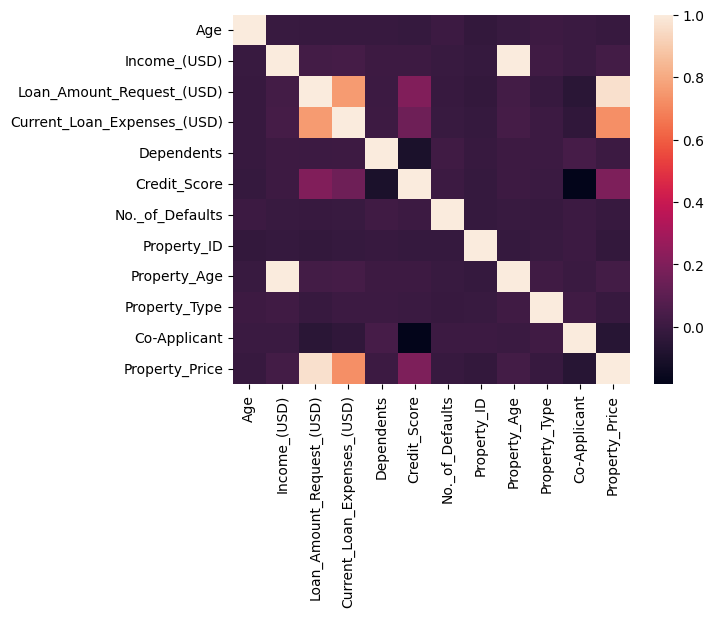

In [53]:
sns.heatmap(x_train[numerical_columns].corr())

In [54]:
correlations = x_train[numerical_columns].corr().abs()

unstacked = correlations.unstack()
sorted = unstacked.sort_values(kind="quicksort")

print("Pairs of variables with high correlations:")
sorted[(sorted>0.7) & (sorted < 1)]

Pairs of variables with high correlations:


Property_Price               Current_Loan_Expenses_(USD)    0.725192
Current_Loan_Expenses_(USD)  Property_Price                 0.725192
                             Loan_Amount_Request_(USD)      0.755623
Loan_Amount_Request_(USD)    Current_Loan_Expenses_(USD)    0.755623
                             Property_Price                 0.963156
Property_Price               Loan_Amount_Request_(USD)      0.963156
dtype: float64

Choose columns to drop

In [55]:
# leave at least one highly correlated variable
corr_columns_to_drop = ["Property_Price", "Current_Loan_Expenses_(USD)"]

for column in corr_columns_to_drop:
    if "correlation" in dropped_columns:
        dropped_columns["correlation"] += [column]
    else:
        dropped_columns.update({"correlation": [column]})


x_train.drop(corr_columns_to_drop, axis=1, inplace=True)
x_test.drop(corr_columns_to_drop, axis=1, inplace=True)

for column in corr_columns_to_drop:
    numerical_columns.remove(column)

#### Handling skewed data

Decreasing skewness may improve model performance.

FYI kung di kayo nagtransform ng skewed data, mas malaki yung chance na maraming matatanggal na rows if tatanggalin yung outliers

In [56]:
print("Initial skewness of data:")
x_train[numerical_columns].skew()

Initial skewness of data:


Age                           0.150004
Income_(USD)                 87.207384
Loan_Amount_Request_(USD)     1.146548
Dependents                    0.721401
Credit_Score                  0.207251
No._of_Defaults               1.576940
Property_ID                  -0.010293
Property_Age                 87.207384
Property_Type                 0.062835
Co-Applicant                 -9.808229
dtype: float64

In [57]:
x_train[numerical_columns].describe()

,Age,Income_(USD),Loan_Amount_Request_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant
count,7734.000000,7.734000e+03,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000,7.734000e+03,7734.000000,7734.000000
mean,37.682958,2.848694e+03,91309.208167,2.328937,751.205437,0.190458,501.398371,2.848694e+03,2.446729,0.989915
std,14.893391,2.023841e+04,59916.038195,0.956522,61.397691,0.392688,285.430880,2.023841e+04,1.112660,0.099925
min,18.000000,4.501600e+02,6174.700000,1.000000,650.000000,0.000000,1.000000,4.501600e+02,1.000000,0.000000
25%,23.000000,1.688005e+03,42176.290000,2.000000,698.982500,0.000000,252.000000,1.688005e+03,1.000000,1.000000
50%,37.000000,2.299495e+03,77495.395000,2.000000,746.985000,0.000000,501.000000,2.299495e+03,2.000000,1.000000
75%,51.000000,3.159142e+03,124050.052500,3.000000,800.260000,0.000000,747.000000,3.159142e+03,3.000000,1.000000
max,64.000000,1.777460e+06,447860.560000,10.000000,892.180000,1.000000,999.000000,1.777460e+06,4.000000,1.000000


In [58]:
positive_skew_options = {"sqrt":np.sqrt, "cbrt":np.cbrt, "log":np.log1p, "none":lambda x : x}
negative_skew_options = {'sq': np.square, 'cb': lambda x : x**3, "none": lambda x : x}

# ----------------------------------------------------------------------------

positive_skew_string = ""
for i in range(len(positive_skew_options)):
    positive_skew_string = positive_skew_string + str(i) + " : " + list(positive_skew_options.keys())[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("Choose your transformation for positive skew: " + positive_skew_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(positive_skew_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

positive_skew_choice = list(positive_skew_options)[choice]

# ----------------------------------------------------------------------------

negative_skew_string = ""
for i in range(len(negative_skew_options.keys())):
    negative_skew_string = negative_skew_string + str(i) + " : " + list(negative_skew_options.keys())[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("Choose your transformation for negative skew: " + negative_skew_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(negative_skew_options.keys())):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

negative_skew_choice = list(negative_skew_options.keys())[choice]

# ----------------------------------------------------------------------------
skews = list(x_train[numerical_columns].skew())
for i in range(len(numerical_columns)):
    skew = skews[i]
    if skew >= 1:
        x_train[numerical_columns[i]] = x_train[numerical_columns[i]].apply(positive_skew_options[positive_skew_choice])
        x_test[numerical_columns[i]] = x_test[numerical_columns[i]].apply(positive_skew_options[positive_skew_choice])
    elif skew <= -1:
        x_train[numerical_columns[i]] = x_train[numerical_columns[i]].apply(negative_skew_options[negative_skew_choice])
        x_test[numerical_columns[i]] = x_test[numerical_columns[i]].apply(negative_skew_options[negative_skew_choice])

x_train[numerical_columns].skew()

Age                           0.150004
Income_(USD)                 38.858120
Loan_Amount_Request_(USD)     0.396993
Dependents                    0.721401
Credit_Score                  0.207251
No._of_Defaults               1.576940
Property_ID                  -0.010293
Property_Age                 38.858120
Property_Type                 0.062835
Co-Applicant                 -9.808229
dtype: float64

#### Handling Outliers

Note: numerical variables with Interquartile Range (iqr) = 0, will not be considered for outlier removal

In [59]:
outlier_options = ["remove", "remove_limit_percent","none"]

# ----------------------------------------------------------------------------

# test outlier removal
test = x_train.copy()
initial_rows = test.shape[0] 
for column in numerical_columns:
    q1 = np.percentile(x_train[column], 25)
    q3 = np.percentile(x_train[column], 75)
    iqr = q3-q1
    if iqr == 0:
        continue
    upper = q3 +1.5*iqr
    lower = q1 -1.5*iqr
    test = test[(test[column] <= upper) & (test[column] >= lower)]
    
final_rows = test.shape[0] 
removed = initial_rows - final_rows
percentage = removed/initial_rows * 100

# ----------------------------------------------------------------------------

outlier_string = ""
for i in range(len(outlier_options)):
    if outlier_options[i] == "remove":
        outlier_string = outlier_string + str(i) + " : " + outlier_options[i] + " (results in " + "{:.2f}".format(percentage) +"% training data removal) | "
    else:
        outlier_string = outlier_string + str(i) + " : " + outlier_options[i] + " | "

valid_input = False
while valid_input == False:

    choice = input("What will you do with outliers? " + outlier_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(outlier_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

outlier_choice = outlier_options[choice]

# ----------------------------------------------------------------------------

if outlier_choice == "remove":
    x_train = test
    print("Removed {} rows with outliers, resulting in a {}% training set data loss".format(removed, percentage))

elif outlier_choice == "remove_limit_percent":

    valid_input = False
    while valid_input == False:
        max_percent = input("Set the maximum percentage loss of data (range between 0.1 to {:.2f}): ".format(percentage))
        try:
            max_percent = float(max_percent)
            if (max_percent <= percentage) & (max_percent >= 0.1):
                valid_input = True
        except:
            print("Invalid input.")
    
    def function_to_minimize(x):
        test = x_train.copy()
        initial_rows = test.shape[0] 

        for column in numerical_columns:
            q1 = np.percentile(x_train[column], 25)
            q3 = np.percentile(x_train[column], 75)
            iqr = q3-q1
            if iqr == 0:
                continue
            upper = q3 +x*iqr
            lower = q1 -x*iqr
            test = test[(test[column] <= upper) & (test[column] >= lower)]
    
        final_rows = test.shape[0] 
        removed = initial_rows - final_rows
        percentage = removed/initial_rows * 100
        return abs(max_percent - percentage)
    
    result = minimize_scalar(function_to_minimize)

    test = x_train.copy()
    initial_rows = test.shape[0] 

    for column in numerical_columns:
        q1 = np.percentile(x_train[column], 25)
        q3 = np.percentile(x_train[column], 75)
        iqr = q3-q1
        if iqr == 0:
            continue
        upper = q3 +result.x*iqr
        lower = q1 -result.x*iqr
        test = test[(test[column] <= upper) & (test[column] >= lower)]

    final_rows = test.shape[0] 
    removed = initial_rows - final_rows
    percentage = removed/initial_rows * 100

    x_train = test
    print("Removed {} rows with outliers, resulting in a {:.2f}% training set data loss".format(removed, percentage))


elif outlier_choice =="none":
    removed =0

if removed != 0:

    if "outlier" in dropped_rows:
        dropped_rows["outlier"] += removed
    else:
        dropped_rows.update({"outlier" : removed})


Removed 327 rows with outliers, resulting in a 4.228083785880528% training set data loss


#### Scaling

Making sure numerical values are generally close in values across columns to avoid bias.

In [60]:
scaler_options = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]
scaler_string = ""
for i in range(len(scaler_options)):
    scaler_string = scaler_string + str(i) + " : " + str(scaler_options[i]) + " | "

valid_input = False
while valid_input == False:

    choice = input("Choose your scaler. " + scaler_string + "Input the integer of your choice. ")

    try:
        choice = int(choice)
        if choice in range(len(scaler_options)):
            valid_input = True
    except:
        print("That is not a valid input. Choose again.")

scaler = scaler_options[choice]

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns= x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.transform(x_test), columns= x_train.columns, index = x_test.index)

x_train.head()

,Age,Income_(USD),Loan_Amount_Request_(USD),Dependents,Credit_Score,No._of_Defaults,Property_ID,Property_Age,Property_Type,Co-Applicant,...,Location_Semi-Urban,Location_Urban,Expense_Type_1_N,Expense_Type_1_Y,Expense_Type_2_N,Expense_Type_2_Y,Has_Active_Credit_Card_Inactive,Has_Active_Credit_Card_Unpossessed,Property_Location_Semi-Urban,Property_Location_Urban
20672,-1.318080,0.902362,0.522711,-0.314850,2.055556,2.069581,-0.435608,0.902362,1.394561,0.100456,...,-1.660146,3.047540,0.760245,-0.760245,-0.674902,0.674902,-0.710546,1.442607,1.376405,-0.670879
3627,1.428650,0.094307,-0.803972,-1.448036,-1.120236,-0.483190,0.061953,0.094307,-1.298924,0.100456,...,0.602357,-0.328134,0.760245,-0.760245,1.481697,-1.481697,-0.710546,1.442607,1.376405,-0.670879
3761,1.629631,0.698135,2.361220,1.951522,-1.039973,-0.483190,0.160063,0.698135,-0.401095,0.100456,...,-1.660146,-0.328134,0.760245,-0.760245,1.481697,-1.481697,-0.710546,-0.693190,-0.726530,1.490582
1535,-1.184093,0.080618,-0.351120,0.818336,-1.457115,-0.483190,1.435501,0.080618,1.394561,0.100456,...,0.602357,-0.328134,-1.315366,1.315366,-0.674902,0.674902,1.407368,-0.693190,1.376405,-0.670879
4129,1.763617,0.322706,-1.292028,-1.448036,-0.485633,-0.483190,1.663258,0.322706,-1.298924,0.100456,...,0.602357,-0.328134,0.760245,-0.760245,1.481697,-1.481697,-0.710546,-0.693190,-0.726530,1.490582


## Summary

In [61]:
train_data = pd.concat([x_train,y_train], axis=1, join="inner").reset_index(drop=True)
test_data = pd.concat([x_test,y_test], axis=1, join="inner").reset_index(drop=True)

y_train = train_data[target_column]
x_train = train_data.drop([target_column], axis=1)
y_test = test_data[target_column]
x_test = test_data.drop([target_column], axis=1)

y_train.to_csv("./current iteration files/y_train.csv")
x_train.to_csv("./current iteration files/x_train.csv")
y_test.to_csv("./current iteration files/y_test.csv")
x_test.to_csv("./current iteration files/x_test.csv")

print("Total removed rows: {} | Removed {:.2f}% of original dataset.".format(dataset_original_rows - x_train.shape[0] - x_test.shape[0], (dataset_original_rows - x_train.shape[0] - x_test.shape[0]) / dataset_original_rows * 100 ))


Total removed rows: 20739 | Removed 69.13% of original dataset.


In [62]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


In [63]:
print("Summary of removed columns:")
print(json.dumps(dropped_columns, cls=NpEncoder, indent=5))
print()
print("Summary of removed rows:")
print(json.dumps(dropped_rows, cls=NpEncoder, indent=5))


Summary of removed columns:
{
     "unnecessary": [
          "Customer_ID",
          "Name"
     ],
     "correlation": [
          "Property_Price",
          "Current_Loan_Expenses_(USD)"
     ]
}

Summary of removed rows:
{
     "target column missing value": 340,
     "impossible_value": 8414,
     "Gender missing values": 37,
     "Income_(USD) missing values": 3864,
     "Income_Stability missing values": 1053,
     "Type_of_Employment missing values": 4263,
     "Current_Loan_Expenses_(USD) missing values": 62,
     "Dependents missing values": 1037,
     "Credit_Score missing values": 585,
     "Has_Active_Credit_Card missing values": 532,
     "Property_Age missing values": 112,
     "Property_Location missing values": 113,
     "outlier": 327
}


In [64]:

preprocessing_steps = {"dataset path":dataset_path, "target column":target_column, "dropped columns":dropped_columns, "missing values": missing_value_steps, 'y_impossible':y_impossible_choice, 'skewness': {"positive":positive_skew_choice, "negative":negative_skew_choice}, "outliers":outlier_choice, "scaler": str(scaler)}

print(json.dumps(preprocessing_steps, indent=5, cls=NpEncoder))

with open("./current iteration files/preprocessing.json", "w") as outfile: 
    json.dump(preprocessing_steps, outfile)

{
     "dataset path": "./datasets/original.csv",
     "target column": "Loan_Sanction_Amount_(USD)",
     "dropped columns": {
          "unnecessary": [
               "Customer_ID",
               "Name"
          ],
          "correlation": [
               "Property_Price",
               "Current_Loan_Expenses_(USD)"
          ]
     },
     "missing values": {
          "Gender": "delete_rows",
          "Income_(USD)": "delete_rows",
          "Income_Stability": "delete_rows",
          "Type_of_Employment": "delete_rows",
          "Current_Loan_Expenses_(USD)": "delete_rows",
          "Dependents": "delete_rows",
          "Credit_Score": "delete_rows",
          "Has_Active_Credit_Card": "delete_rows",
          "Property_Age": "delete_rows",
          "Property_Location": "delete_rows"
     },
     "y_impossible": "remove all <= 0",
     "skewness": {
          "positive": "sqrt",
          "negative": "sq"
     },
     "outliers": "remove",
     "scaler": "StandardScaler